# Lab 3
## Problem 1
### A)
We need to remove data where the real temperature if off-nominal as well as misread by the thermometry.

With no signal, we expect the background distribution to be Gaussian with a mean of 12 K and a standard deviation of 0.4 K. In order to remove anomalies from the meta-data, we ask: 
- what is the significance of data three standard deviations above or below the expected mean?
- what is the significance of values measured above 3-sigma?

By looking at the bad data, we can construct integrals depending on whether it is below or above the mean.

For data below the mean, we integrate from neg infinity to a value x.
$$\int^t_{-\infty} \frac{1}{\sqrt{2\pi}}e^{-x^2/2} dx < 0.3%$$

For data above the mean, we integrate from a value x to pos infinity.
$$\int^{\infty}_t \frac{1}{\sqrt{2\pi}}e^{-x^2/2} dx < 0.3$$

Mean:  12.000388468879656
SD:  0.4000892990349886
Range:  10.298733635344417 13.80401359525773

-------------------

below:  -5.000000000000001
below:  -4.249999999999997
below:  -24.750000000000004
below:  -30.0
below:  -30.0
above:  inf
above:  inf
above:  1.7499999999999984

-------------------

Sigma:  1 [68332, 31668]
Sigma:  3 [99715, 285]
Sigma:  5 [100000, 0]


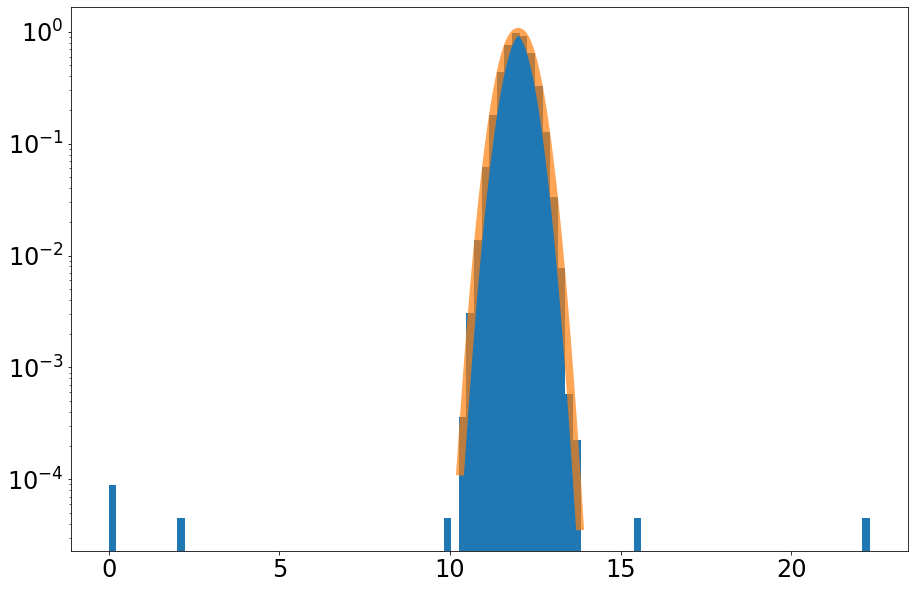

In [284]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
good = stats.norm.rvs(loc = 12., scale = 0.4, size = 100000)
bad = [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]
d = np.append(good, bad)
ax1.hist(d,100, density=True)
ax1.tick_params(labelsize = 24)
ax1.set_yscale('log')

mean = np.mean(good)
print("Mean: ", mean)
std = np.std(good)
print("SD: ", std)
print("Range: ", np.amin(good), np.amax(good))

x = np.linspace(np.amin(good), np.amax(good), 1000)
ax1.plot(x, stats.norm.pdf(x, 12., 0.4),linewidth = 8,alpha = 0.7)

print("\n-------------------\n")
        
for n in bad:
    if (n < 12.):
        print("below: ", stats.norm.ppf(stats.norm.cdf(n, loc=12., scale=0.4)))
    else:
        print("above: ", stats.norm.ppf(stats.norm.cdf(n, loc=12., scale=0.4)))

print("\n-------------------\n")

for i in [1,3,5]:
    bad_count = 0
    good_count = 0
    for n in good:
        if abs(n - mean) > i*std:
            bad_count += 1
        else:
            good_count += 1        
    print("Sigma: ", i, [good_count, bad_count])
    
plt.show()

Looking at the bad data, we can assume data greater than 3 standard deviations away from the mean is a fault of the thermometry and within 3-sigma a fault of the thermal control system. The reasoning is that a faulty thermal control system would not cause the temperature to vary to drastically and so data greater than 3 standard deviations away are thermometry errors.

<div align='center'>Threshold of 1-sigma</div>

|              | True Temp | Bad Temp |
|--------------|-----------|----------|
| Good Measure |   68332   |   32688  |
| Bad Measure  |     8     |     0    |

&nbsp;

<div align='center'>Threshold of 3-sigma</div>

|              | True Temp | Bad Temp |
|--------------|-----------|----------|
| Good Measure |   99730   |    270   |
| Bad Measure  |     7     |     1    |

&nbsp;

<div align='center'>Threshold of 5-sigma</div>

|              | True Temp | Bad Temp |
|--------------|-----------|----------|
| Good Measure |   100000  |     0    |
| Bad Measure  |     6     |     2    |

### B)

In choosing 3$\sigma$ as the statistical threshold, the number of omissions contributes about 0.3% of all data and is a predicatble quantity following the empirical rule.

### C)

There is bad data being included with both thermal control system and thermometry errors which can be avoided by tightening the statistical threshold to within 3-sigma.

## Problem 2
- what value are you really interested in?
- what distribution describes that value?

- the difference between pictures of an asteroid
- given a (delta x, delta y), this is the uncertainty of the center of the object
- if a star appears to have not moved, how unsure is its center 

- find a range of x and y values such that we know that there is movement, likely in the center

- for where we know there is movement(5 sigma), find the x,y

- a star would have had to move this sqrt(x,y) distance to be significant(5-sigma)

### 1.

Given a plot of 2D uncertainty in position, an rms(average magnitude) of 1, and Gaussian distributions, what distance in arcseconds would give us a significance of 5-sigma? Relating this question to the plot, at what (x,y) values does the uncertainty become low enough such that we get a 5-sigma detection?

### 2.

Integrate the with a two-tail measurement of individual x and y distributions to get probabilities. Then get the magnitude of probabilities and convert to a significance. Except we know the significance and we want x and y.

$$P(x,y) = \int\int pdf()$$

### 3.

0.9976319009982246 1.0042097345238206

----------------

0.4536569300959781
-0.11642735054062145

----------------

0.749999437815049 0.25
0.999999718907485
5.003774546809661
[0.99999971 0.99999971]


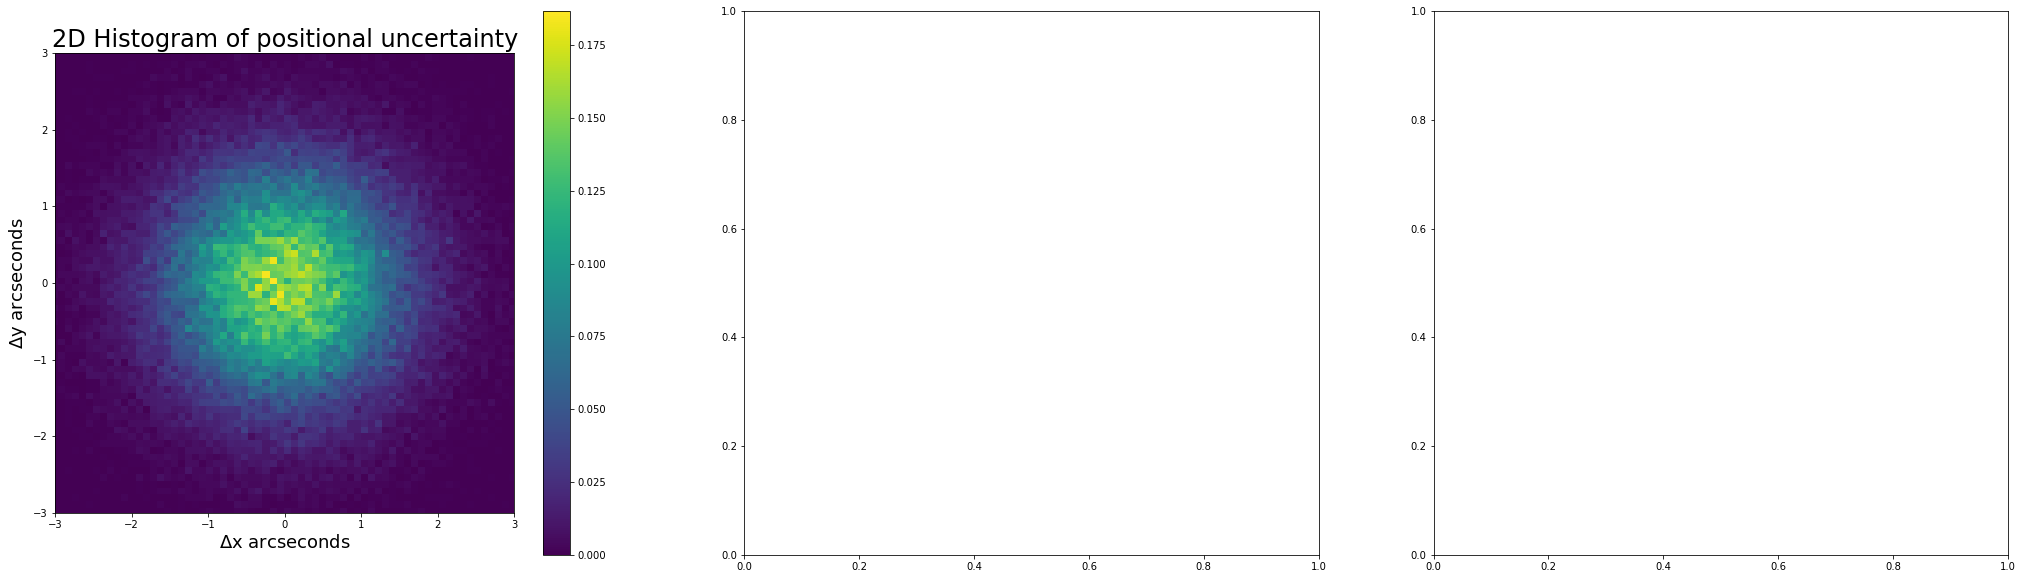

In [283]:
x_std = np.std(stats.norm.rvs( loc = 1, size = 100000))
y_std = np.std(stats.norm.rvs( loc = 1, size = 100000))
print(x_std,y_std)
# print(stats.pearsonr(x_std,y_std))
x = stats.norm.rvs( scale = 1, size = 100000)
y = stats.norm.rvs( scale = 1, size = 100000)
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape

fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(35,10))
h = ax1.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax1.set_aspect('equal', 'box')
ax1.set_xlim([-3 , 3])
ax1.set_ylim([-3 , 3])
ax1.set_title("2D Histogram of positional uncertainty", fontsize = 24)
ax1.set_ylabel("$\Delta$y arcseconds", fontsize = 18)
ax1.set_xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax1)

# ax2.hist(x, 100)
# ax2.set_title("X uncertainty distribution", fontsize = 18)
# ax3.hist(y, 100)
# ax3.set_title("Y uncertainty distribution", fontsize = 18)

print("\n----------------\n")

# [0.54495155, 0.54495155]
# [1.1077962, 0]

x = 1.1077962
y = 0

x2 = stats.norm.cdf(x, scale=1)**2
y2 = stats.norm.cdf(y, scale=1)**2
print(x2,y2)
prob = np.sqrt(x2+y2)
print(stats.norm.ppf(prob))
print(stats.multivariate_normal.cdf([5,5],cov=1))

plt.show()

## Problem 3
- what type of measurement?
- what should the background distribution look like?
- what should a signal look like?

### 1.

### 2.

### 3.